# Homework 1

**DUE OCT 19th by 11:59PM**

Homework 1 is done in Jupyter Notebook to give you a chance to familiarize yourself to this powerful tool for data analysis. 

In Jupyter Notebook, codes and texts are executed in cells. Texts are written in Markdown cell, as you can see in the homework instructions below. Codes are written in code cells. Cells are run one at a time. You can change the cell type by navigating to Cell -> Cell Type.

There are spaces for you to enter your answers to the questions, either in code or text. Feel free to add more cells if you need (likely).

In many parts, some Scikit-learn functions and classes have already been imported to give you leads on what you may need to use. You still need to refer to the Scikit-learn documentation to learn how the classes and methods work. You can use other publicly available libraries and packages if you want, as long as they finish the work. 

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures**. Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1

Increase your familiarity with Github. This problem needs to be finished with a partner. Follow these steps to finish the problem:

1.   Create a github account.
2.   Create a public repository and push a helloworld.py file.
3.   Person $A$ forks Person $B$'s repo and modifies the file, then pushes to their own fork and finally creates a pull request for person B to merge.
4.   Person $B$ reviews and merges the pull request.
5.   Do the same for $A$ and $B$ reversed.

Provide the links to your repo and your partner's repo.

The link for my repo: https://github.com/Saiprem98/CS190DD_HW1

The link for my partner's repo: https://github.com/priya107/cs190dd_hw1

## Problem 2

In this problem, you will consider solving the least-squared problem in two different approaches, one using Gradient Descent and the other using the formula. After that, you will compare the results you get from both approaches.

a) Load the 1-D data and the labels from **'linear_regression.csv'**. The first column contains the data values and the second column contains the labels. Store the data in a variable ***X***. Similarly, store the labels in a variable ***y***.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('linear_regression.csv', header = None )
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

b) Fit a linear regression model, in the form $Ax + b$, using the formula. Print out the parameters $A$ and $b$.

In [3]:
#Fit a linear regression model, in the form  𝐴𝑥+𝑏
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Print out the parameters  𝐴  and  𝑏
print(regressor.coef_)
print(regressor.intercept_)

[7.526347]
0.20313216364663322


Visualize your result in a 2-D plot. Your plot should show the data points and the line $Ax + b$.

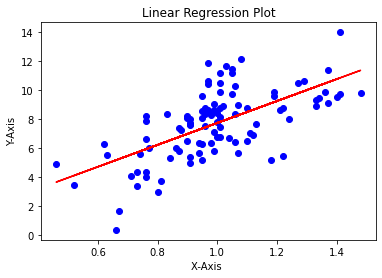

In [4]:
# Visualize your result in a 2-D plot. Your plot should show the data points and the line  𝐴𝑥+𝑏
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Linear Regression Plot')
plt.xlabel('X-Axis ')
plt.ylabel('Y-Axis')
plt.show()

c) Now, fit a linear regression model using Gradient Descent. Print out the parameters $A$ and $b$.

In [5]:
# Now, fit a linear regression model using Gradient Descent
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor()
regressor.fit(X, y)



SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [12]:
# Print out the parameters  𝐴  and  𝑏 
print(regressor.coef_)
print(regressor.intercept_)

[4.46731646]
[3.29906029]


Visualize your result in a 2-D plot similar to that in part **b**. Compare your results from both parts.

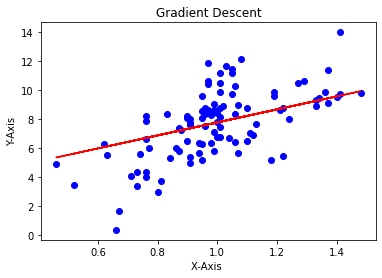

In [13]:
# Visualize your result in a 2-D plot
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Gradient Descent')
plt.xlabel('X-Axis ')
plt.ylabel('Y-Axis')
plt.show()

When looking at the results for both the gradient descent model and the linear regression model it is easily observable that both the models predict the data differently despite being given the same data. To quantify this we can look at the coefficients and intercepts printed for both functions. To get a more accurate analysis of which model performs better you would need to perform a MSE. 

## Problem 3

In this problem, you will train classifiers using two widely used algorithms, Support Vector Machine (SVM) and Random Forest (RF). You will train and fine-tune each model using cross-validation (CV). After that, you will compare the performance of SVM and RF for this problem.

a) A 13-D dataset with labels is given in **'wine.csv'**. The last column contains the labels. Store the data and the labels in variables ***X*** and ***y***, respectively.

In [6]:
#  Store the data and the labels in variables X and y
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('wine.csv',header = None)
X = dataset.iloc[:, 0:12].values
y = dataset.iloc[:, 13].values

Split the data into a train set and a test set. The size of the train set is 90% of the dataset.

In [7]:
# Split the data into a train set and a test set. The size of the train set is 90% of the dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

b) Find a good SVM model by performing 10-fold CV on the train set. Try different set of model parameters and record the resulting model performance during CV. Print out your best model's parameters and its performance (accuracy).

In [9]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


tuned_parameters = [{'kernel': ['linear','rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],'degree' : [1,2,3,4,5]}]
k_fold = KFold(n_splits=10)


for train, test in k_fold.split(X_train):

    clf = GridSearchCV(SVC(), tuned_parameters)
    clf.fit(X[train], y[train])

    print("Best parameters set found are:")
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    
    print()
    print()
        
print("The best parameters I found are:'C': 100, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear' ")

Best parameters set found are:
{'C': 100, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}

Grid scores on development set:
0.910 (+/-0.135) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.646 (+/-0.150) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.528 (+/-0.060) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}
0.646 (+/-0.150) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'linear'}
0.528 (+/-0.060) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear'}
0.646 (+/-0.150) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'linear'}
0.528 (+/-0.060) 

Best parameters set found are:
{'C': 1000, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:
0.924 (+/-0.110) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.660 (+/-0.097) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.924 (+/-0.110) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.541 (+/-0.086) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.924 (+/-0.110) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}
0.660 (+/-0.097) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
0.924 (+/-0.110) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'linear'}
0.541 (+/-0.086) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}
0.924 (+/-0.110) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear'}
0.660 (+/-0.097) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}
0.924 (+/-0.110) for {'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'linear'}
0.541 (+/-0.086) f

Best parameters set found are:
{'C': 1000, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:
0.924 (+/-0.067) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.744 (+/-0.116) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.924 (+/-0.067) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.639 (+/-0.031) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.924 (+/-0.067) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}
0.744 (+/-0.116) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
0.924 (+/-0.067) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'linear'}
0.639 (+/-0.031) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}
0.924 (+/-0.067) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear'}
0.744 (+/-0.116) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}
0.924 (+/-0.067) for {'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'linear'}
0.639 (+/-0.031) fo

Best parameters set found are:
{'C': 10, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}

Grid scores on development set:
0.910 (+/-0.135) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.682 (+/-0.183) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.577 (+/-0.142) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}
0.682 (+/-0.183) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'linear'}
0.577 (+/-0.142) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear'}
0.682 (+/-0.183) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}
0.910 (+/-0.135) for {'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'linear'}
0.577 (+/-0.142) f

Best parameters set found are:
{'C': 1000, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:
0.903 (+/-0.118) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.750 (+/-0.138) for {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.903 (+/-0.118) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.667 (+/-0.115) for {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.903 (+/-0.118) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}
0.750 (+/-0.138) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
0.903 (+/-0.118) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'linear'}
0.667 (+/-0.115) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'rbf'}
0.903 (+/-0.118) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear'}
0.750 (+/-0.138) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}
0.903 (+/-0.118) for {'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'linear'}
0.667 (+/-0.115) fo

Now train your best SVM model on the whole train dataset and test it on the test set. Print out your model's performance.

In [10]:
# Now train your best SVM model on the whole train dataset
# and test it on the test set. Print out your model's performance.
model = SVC(C = 100, degree= 1, gamma = 0.001, kernel = 'linear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
print("accuracy: ",accuracy)

accuracy:  1.0


c) Similarly, find a good RF model by performing 10-fold CV on the train set. Print out your best model's parameters and its performance (accuracy).

In [11]:
from sklearn.ensemble import RandomForestClassifier
tuned_parameters = [{'criterion': ['gini','entropy'],
                     'n_estimators': [1, 10],
                     'max_depth' : [1,2],
                     'min_samples_split' : [0.5,2],
                     'max_features': ['auto','sqrt','log2']}]
k_fold = KFold(n_splits=10)

for train, test in k_fold.split(X_train):

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters)
    clf.fit(X[train], y[train])

    print("Best parameters set found are:")
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    
    print()
    print()
print("The best parameters I found are:'C': 100, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear' ")

Best parameters set found are:
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}

Grid scores on development set:
0.659 (+/-0.228) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 1}
0.805 (+/-0.208) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 10}
0.633 (+/-0.209) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1}
0.804 (+/-0.355) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
0.590 (+/-0.169) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 1}
0.771 (+/-0.280) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 10}
0.639 (+/-0.188) for {'criterion': 'gini', 'max_depth': 1, 'max

Best parameters set found are:
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}

Grid scores on development set:
0.612 (+/-0.172) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 1}
0.848 (+/-0.245) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 10}
0.555 (+/-0.142) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1}
0.771 (+/-0.117) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
0.660 (+/-0.185) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 1}
0.778 (+/-0.176) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 10}
0.660 (+/-0.097) for {'criterion': 'gini', 'max_depth': 1, 'max

Best parameters set found are:
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10}

Grid scores on development set:
0.688 (+/-0.111) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 1}
0.806 (+/-0.101) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 10}
0.646 (+/-0.168) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1}
0.792 (+/-0.095) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
0.619 (+/-0.251) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 1}
0.777 (+/-0.174) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 10}
0.577 (+/-0.306) for {'criterion': 'gini', 'max_depth': 1, 'max

Best parameters set found are:
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}

Grid scores on development set:
0.611 (+/-0.171) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 1}
0.813 (+/-0.081) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 10}
0.631 (+/-0.204) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1}
0.762 (+/-0.277) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
0.688 (+/-0.120) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 1}
0.805 (+/-0.169) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 10}
0.639 (+/-0.060) for {'criterion': 'gini', 'max_depth': 1, '

Best parameters set found are:
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}

Grid scores on development set:
0.792 (+/-0.129) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 1}
0.785 (+/-0.091) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 0.5, 'n_estimators': 10}
0.744 (+/-0.180) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1}
0.813 (+/-0.092) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
0.660 (+/-0.078) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 1}
0.833 (+/-0.079) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 0.5, 'n_estimators': 10}
0.694 (+/-0.211) for {'criterion': 'gini', 'max_depth': 1, 'max

Test your best RF model on the test set. Print out your model's performance.

In [12]:
# 0.979 (+/-0.034) for {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}
# Test your best RF model on the test set. Print out your model's performance.
model = RandomForestClassifier(criterion = 'entropy', max_depth= 2, max_features = 'sqrt'
                               , min_samples_split = 2,n_estimators = 10)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
print("accuracy: ",accuracy)






accuracy:  1.0


d) Compare the 2 models. Why do we need CV?

Both models produce high accuracy results, but SVM model produces an accuracy of 100%. Despite doing a 10 fold cross validation it appears as if the model is overfitting the data and could perform poorly on new unseen data or this could be the result of the low amount of data given. Each model has different parameters that we used in the grid search resulting in different factors being optimized to improve each model. 
We need CV to avoid the problem of overfitting. Without CV a model has the possibility of failing to predict useful results on unseen data. What CV does is hold out part of the availible data and uses this as a test set to train the model. 


## Problem 4

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

In [10]:
dataset = pd.read_csv('iris.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

b) Train a clustering model using Bottom-up Agglomerative clustering.

In [11]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3).fit(X)
predict = clustering.fit_predict(X)

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

In [12]:
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of iris')
plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

In [6]:
# for i in range(Y):
#     if Y[i] == 
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of iris')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-6-ca33a18be61b>, line 2)

c) Train a clustering model using K-mean clustering.

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1
 0]


Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

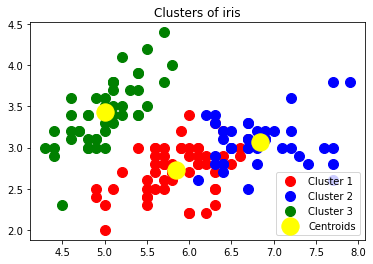

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris')
plt.legend()
plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

In [ ]:
# Due in HW 2 -> Will Complete in HW 2 

d) Perform Principle Component Analysis (PCA) on the data. Project the original data on the 2 largest principle components. Store this new projected 2-D data in a variable ***X_projected***.

In [ ]:
from sklearn.decomposition import PCA


Repeat part **b** on the new 2-D data. Train the Bottom-up Agglomerative model and visualize your results.

In [ ]:
# Due in HW 2 -> Will Complete in HW 2 

Repeat part **c** on the new 2-D data. Train the K-means model and visualize your result.

In [ ]:
# Due in HW 2 -> Will Complete in HW 2 

Compare the quality of 4-D and 2-D clusterings. When would the ideas of projection and dimensionality reduction be useful?

## Problem 5

What is the hypothesis space for problems 1-3? What are the pros and cons of having a large hypothesis space? 

Hypothesis Space for Linear Regression:
Would be the set of all possible linear functions(all possible linear equations). The hypothesis function would just be a line.

Hypothesis Space for SVM:
Would be all the possible set of oriented hyperplanes in R^n(coordinate space for real numbers). For a SVM model that only modifies/changes w and b this would be hypothesis space HN = {𝑓(𝑥)=sign(𝑤^𝑇𝑥+𝑏)∣𝑤∈ℝ^N,𝑏∈ℝ}


Hypothesis Space for Random Forest:
The hypothesis space for a random forest is all the possible trees created which is dependent on the number of variables, number of boolean functions, number of features and attributes. For example a decision tree with 5 boolean attributes would have 2^2^5 trees. 

Hypothesis Space for K-Means Clustering:
For K-Means the hypothesis space would be dependent on K the number of clusters to discover as this is an unsupervised learning algorithm. The hypothesis space would include all the possible types of clusters that could be predicted by the algorithm.

Pros of having a large hypothesis space:
    Results in a high variance 
    Can lead to overfitting as hypothesis space is too expressive
    
Cons of having a large hypothesis space:
    Results in a high bias
    Can lead to underfitting due to the hypothesis space being too limited





## Problem 6

Suppose we find the best binary classifier for a set of red points and another binary classifier for a set of blue points. Now, suppose we are given a new set of $R$ red and $B$ blue points that we can predict to be positive or negative. If we have to choose a subset of $k$ positive points from $R$ union $B$, what would be fair way for choosing. 

You are given a red dataset in 'R.csv' and a blue dataset in 'B.csv'. There is also a third test dataset in 'RBtest.csv'.

a) Load the datasets. All datasets are 2-D with the last column containing the labels. 

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

dataset_R = pd.read_csv('R.csv', header = None )
X_R = dataset_R.iloc[:, [0, 1]].values
y_R = dataset_R.iloc[:, 2].values

dataset_B = pd.read_csv('B.csv', header = None )
X_B = dataset_B.iloc[:, [0, 1]].values
y_B = dataset_B.iloc[:, 2].values

dataset_RB = pd.read_csv('RBtest.csv', header = None )
X_RB = dataset_RB.iloc[:, [0, 1]].values
y_RB = dataset_RB.iloc[:, 2].values

b) Train 2 classifiers, one for the red dataset and the other for the blue dataset. You are free to choose the learning algorithm. 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_R, y_R, test_size = 0.20)

sc_R = StandardScaler()
X_train_R = sc_R.fit_transform(X_train_R)
X_test_R = sc_R.transform(X_test_R)


classifier_R = KNeighborsClassifier(n_neighbors = 5, p = 2)
classifier_R.fit(X_train_R, y_train_R)

y_pred_R = classifier_R.predict(X_test_R)

#####################
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size = 0.20)

sc_B = StandardScaler()
X_train_B = sc_B.fit_transform(X_train_B)
X_test_B = sc_B.transform(X_test_B)

classifier_B = KNeighborsClassifier(n_neighbors = 5, p = 2)
classifier_B.fit(X_train_B, y_train_B)

y_pred_B = classifier_B.predict(X_test_B)

#####################
X_train_RB, X_test_RB, y_train_RB, y_test_RB = train_test_split(X_RB, y_RB, test_size = 0.20)

sc_RB = StandardScaler()
X_train_RB = sc_RB.fit_transform(X_train_RB)
X_test_RB = sc_RB.transform(X_test_RB)

classifier_RB = KNeighborsClassifier(n_neighbors = 5, p = 2)
classifier_RB.fit(X_train_RB, y_train_RB)

y_pred_RB = classifier_RB.predict(X_test_RB)


c) Now use your models to classify instances in the test dataset. The models may agree on many points but may also disagree on many other points. Let's call the set of positive points classified by the red model $P_r$ and the set of positive points classified by the blue model $P_b$. You are asked to pick out $k$ points from the set $P_r \cup P_b$. What is a fair way to do this. Demonstrate your answer with code and visualizations. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


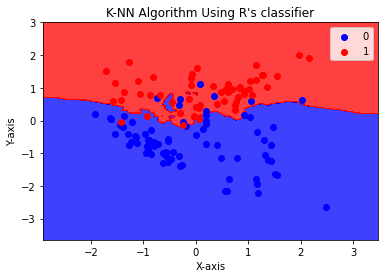

In [15]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train_R, y_train_R
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_R.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('K-NN Algorithm Using R\'s classifier')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


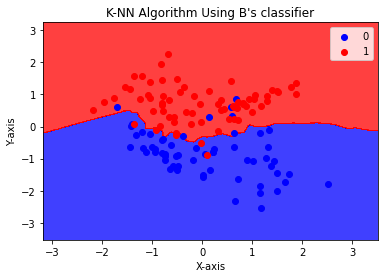

In [16]:
X_set, y_set = X_train_B, y_train_B
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_B.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('K-NN Algorithm Using B\'s classifier')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


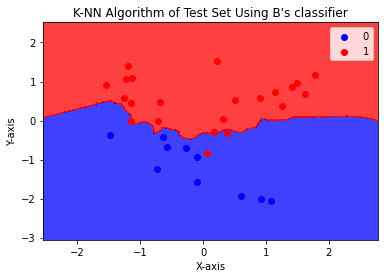

In [17]:
X_set, y_set = X_train_RB, y_train_RB
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_B.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('K-NN Algorithm of Test Set Using B\'s classifier')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


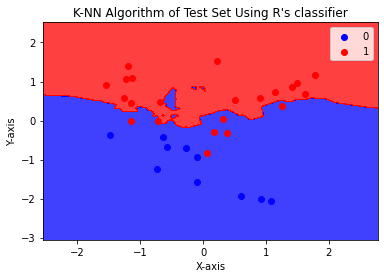

In [19]:
X_set, y_set = X_train_RB, y_train_RB
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_R.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('K-NN Algorithm of Test Set Using R\'s classifier')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

As we can observe when we use the test set given and use the two different models to predict the results we get varriying answers. This is since each classifier is trained on its own data and will create biases on dependent on the data it is given. To create a fair way of choosing the points we have to eliminate the bias that each model creates. To eliminate the bias we would need to evaluate the model the entire model performance and then pick a classifier that is least biased to pick the k points. A more specialized way to get rid of bias especially in a clustering algorithm is to pool new data so that we create a new classifier that only data points from the red cluster and another that only gets points from the blue cluster. Using this we would get a consistent classifier that would be able to remove bias and pick k points in a fair manner.
